In [178]:
# Import necessary packages
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
np.random.seed(1) # Set the random seed for reproduceability

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

#Useful video: https://www.youtube.com/watch?v=n_ZMQj09S6w

In [179]:
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.set_index('date')

ped = ped.drop(["time", "Unnamed: 0"], axis = 1)

#Features of our dataset only temperature, so the rest remains as 0 or 1
standardize = lambda x: (x - x.mean()) / x.std()

# Define our features and labels (⚠️ notice the double bracket for features ⚠️)
X, y = ped[ped.columns[1:]], ped["pedestrians count"]

X

,temperature in ºc,holiday,school holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,8.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,7.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,7.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,7.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,6.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-01-31,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-31,10.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [180]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [181]:
#sklearn provides a nifty function to split train/test sets
from sklearn.model_selection import train_test_split

#Splitting the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [182]:
#Import lightgbm
import lightgbm as lgb
d_train = lgb.Dataset(Xtrain, label = ytrain)

In [314]:
#Setting parameters
lgbm_params = {"learning_rate": 0.09, "boosting_type": "gbdt", #possible are e.g. gradient boosting, random forest or dart, dart seems most accurate
                "objective": "regression",
                "metric": "auc",
                "num_leaves": 30, #dspecification for amount of leaves of the decision tree
                "max_depth": 50} #max depth of a singular leave 

In [325]:
from datetime import datetime

start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 1000)
stop=datetime.now()

#Execution time of the model
execution_time_lgbm = stop-start
print("LGBM execution time is: ", execution_time_lgbm)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 10750, number of used features: 53
[LightGBM] [Info] Start training from score 2614.380000
LGBM execution time is:  0:00:00.631652


In [326]:
#Now predicting the model on the test data
y_pred_lgbm = clf.predict(Xtest)

In [327]:
#predicted data
y_pred_lgbm

array([ 1226.98798738,   127.31347384,  3546.71483032, ...,
        5635.15885567, 14897.76884054,    42.73682737])

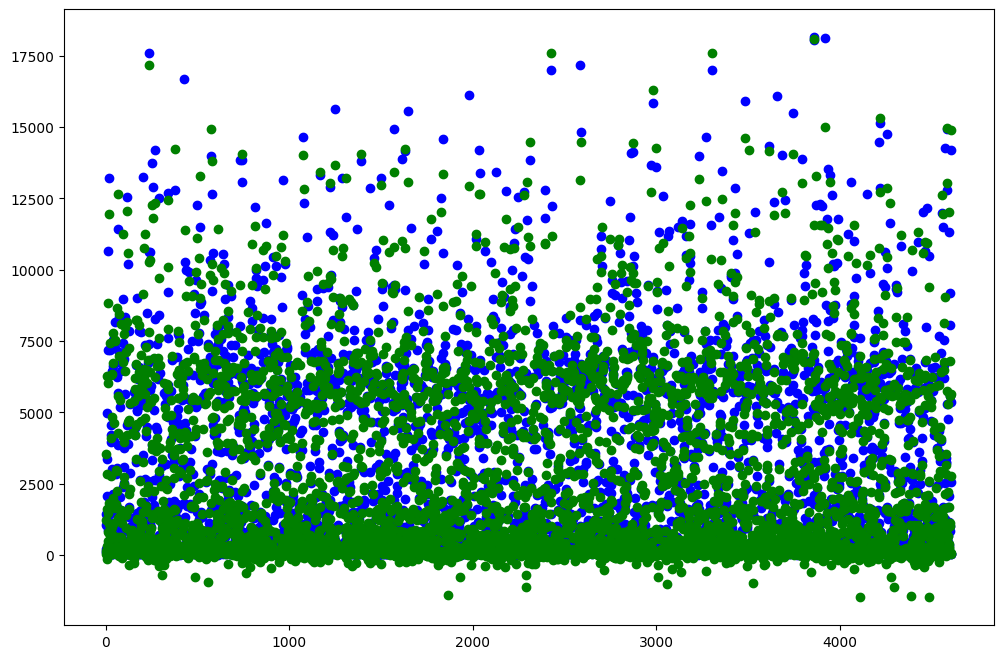

test count     4608.000000
mean      2591.601780
std       3261.570796
min          0.000000
25%        138.000000
50%        943.500000
75%       4776.000000
max      18153.000000
Name: pedestrians count, dtype: float64 AND <class 'pandas.core.series.Series'> und pred count     4608.000000
mean      2601.101222
std       3181.286849
min      -1483.539073
25%        163.796927
50%        963.462692
75%       4928.145550
max      18097.002210
dtype: float64


In [328]:
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])
fig, ax = plt.subplots(figsize=(12, 8))

ypred = y_pred_lgbm

ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='b')

plt.scatter(xs, ypred, color ='green')

plt.show()

print(f"test {ytest.describe()} AND {type(ytest)} und pred {ypred.describe()}")
# Data scatter of predicted values

In [329]:
print(np.sqrt(mean_squared_error(ytest,y_pred_lgbm)))

756.429690675091


In [337]:
import xgboost as xgb
dtrain=xgb.DMatrix(Xtrain, label=ytrain)

#setting parameters for xgboost
parameters={"max_depth": 90,
            "eval_metric": "auc",
            "learning_rate": .05}

start = datetime.now()
xg = xgb.train(parameters, dtrain, 50)
stop = datetime.now()

#Execution time of the model
execution_time_xgb = stop-start
print("XGBoost execution time is: ", execution_time_xgb)

#predicting the model on the test set
dtest = xgb.DMatrix(Xtest)
y_pred_xgb = xg.predict(dtest)

XGBoost execution time is:  0:00:01.495897


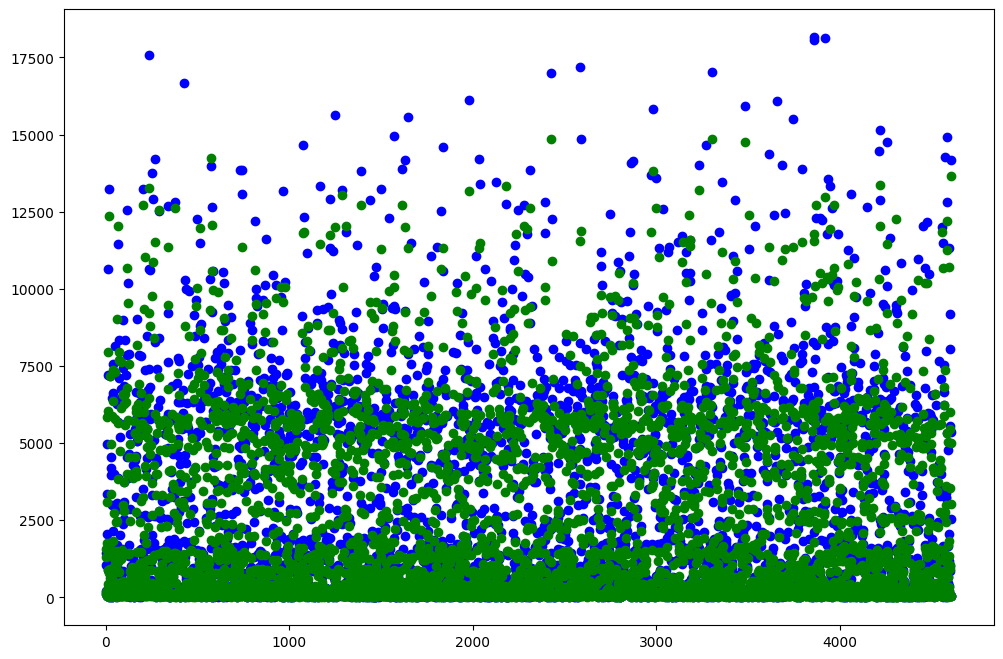

test count     4608.000000
mean      2591.601780
std       3261.570796
min          0.000000
25%        138.000000
50%        943.500000
75%       4776.000000
max      18153.000000
Name: pedestrians count, dtype: float64 AND <class 'pandas.core.series.Series'> und pred count     4608.000000
mean      2357.582520
std       2899.740967
min          4.523267
25%        124.019674
50%        857.227325
75%       4502.986938
max      14863.304688
dtype: float64


In [338]:
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])
fig, ax = plt.subplots(figsize=(12, 8))

ypred = y_pred_xgb

ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='b')

plt.scatter(xs, ypred, color ='green')

plt.show()

print(f"test {ytest.describe()} AND {type(ytest)} und pred {ypred.describe()}")
# Data scatter of predicted values

In [339]:
print(np.sqrt(mean_squared_error(ytest,y_pred_xgb)))

952.3751919881709
